# Part 1: Data Pre-processing and Balancing

In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Load the data
file_path = 'data.csv'
data = pd.read_csv(file_path, delimiter=';')

# Data pre-processing
data.dropna(inplace=True)
data.drop(columns=['http_response_body', 'path'], inplace=True)
data = pd.get_dummies(data, columns=['product_name', 'version', 'cve_number'])

# Split the data into features and target
X = data.drop(columns=['status'])
y = data['status']

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verify class distribution post-SMOTE
print("Class distribution after SMOTE:")
print(y_resampled.value_counts())

# Save the preprocessed data
X_resampled.to_csv('X_resampled.csv', index=False)
y_resampled.to_csv('y_resampled.csv', index=False)


Class distribution after SMOTE:
safe           572
exploitable    572
Name: status, dtype: int64


# Part 2: Model Training and Hyperparameter Tuning

C:\Users\djyes\AppData\Local\Temp\ipykernel_39836\1975960315.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  y_resampled = pd.read_csv('y_resampled.csv', squeeze=True)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Accuracy: 0.9432314410480349
Classification Report:
               precision    recall  f1-score   support

 exploitable       0.89      1.00      0.94       101
        safe       1.00      0.90      0.95       128

    accuracy                           0.94       229
   macro avg       0.94      0.95      0.94       229
weighted avg       0.95      0.94      0.94       229



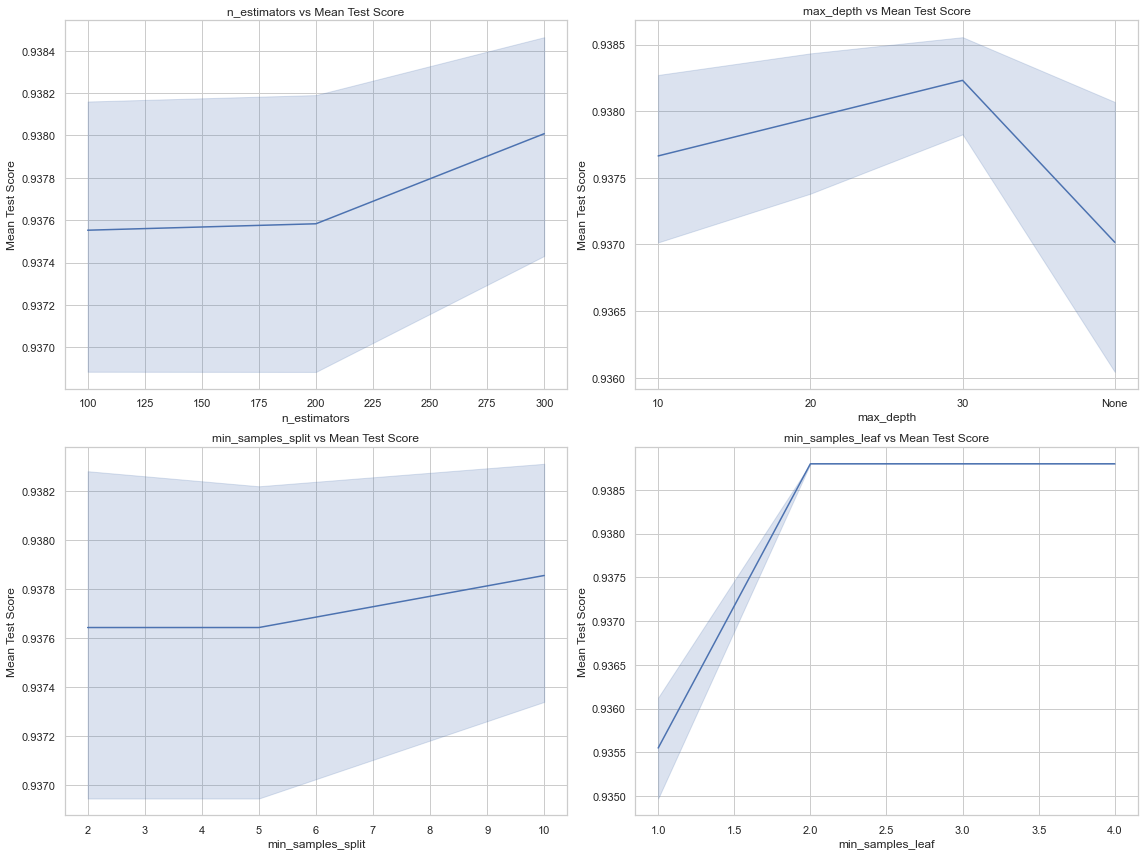

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed data
X_resampled = pd.read_csv('X_resampled.csv')
y_resampled = pd.read_csv('y_resampled.csv', squeeze=True)

# Split the balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Hyperparameter tuning using Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Train the best model
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Save the trained model
joblib.dump(best_model, 'random_forest_model.joblib')

# Evaluate the model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# Visualization of Hyperparameter Tuning Results
results = pd.DataFrame(grid_search.cv_results_)
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot for n_estimators
sns.lineplot(ax=axes[0, 0], x=results['param_n_estimators'], y=results['mean_test_score'])
axes[0, 0].set_title('n_estimators vs Mean Test Score')
axes[0, 0].set_xlabel('n_estimators')
axes[0, 0].set_ylabel('Mean Test Score')

# Plot for max_depth
sns.lineplot(ax=axes[0, 1], x=results['param_max_depth'].astype(str), y=results['mean_test_score'])
axes[0, 1].set_title('max_depth vs Mean Test Score')
axes[0, 1].set_xlabel('max_depth')
axes[0, 1].set_ylabel('Mean Test Score')

# Plot for min_samples_split
sns.lineplot(ax=axes[1, 0], x=results['param_min_samples_split'], y=results['mean_test_score'])
axes[1, 0].set_title('min_samples_split vs Mean Test Score')
axes[1, 0].set_xlabel('min_samples_split')
axes[1, 0].set_ylabel('Mean Test Score')

# Plot for min_samples_leaf
sns.lineplot(ax=axes[1, 1], x=results['param_min_samples_leaf'], y=results['mean_test_score'])
axes[1, 1].set_title('min_samples_leaf vs Mean Test Score')
axes[1, 1].set_xlabel('min_samples_leaf')
axes[1, 1].set_ylabel('Mean Test Score')

plt.tight_layout()
plt.show()


# Part 3: Evaluation and Visualization

C:\Users\djyes\AppData\Local\Temp\ipykernel_39836\3926621565.py:9: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  y_resampled = pd.read_csv('y_resampled.csv', squeeze=True)


Accuracy: 0.9432314410480349
Classification Report:
               precision    recall  f1-score   support

 exploitable       0.89      1.00      0.94       101
        safe       1.00      0.90      0.95       128

    accuracy                           0.94       229
   macro avg       0.94      0.95      0.94       229
weighted avg       0.95      0.94      0.94       229



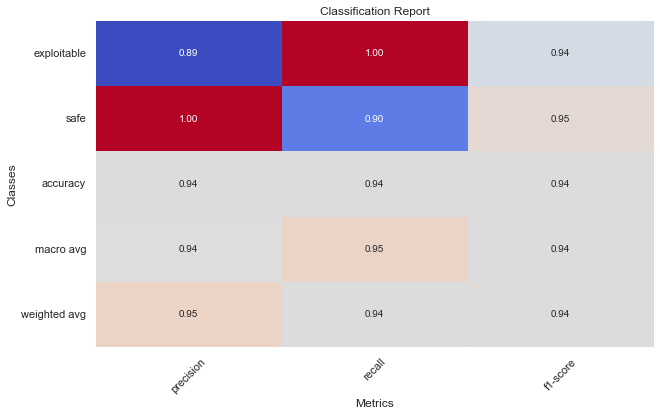

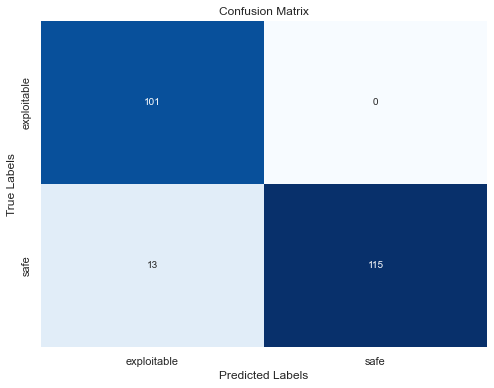

In [4]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed data
X_resampled = pd.read_csv('X_resampled.csv')
y_resampled = pd.read_csv('y_resampled.csv', squeeze=True)

# Split the balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Load the trained model
best_model = joblib.load('random_forest_model.joblib')

# Evaluate the model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# Visualization of the classification report
def plot_classification_report(report):
    report_df = pd.DataFrame(report).transpose()
    report_df = report_df.drop(['support'], axis=1)
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(report_df, annot=True, cmap='coolwarm', fmt='.2f', cbar=False)
    plt.title('Classification Report')
    plt.xlabel('Metrics')
    plt.ylabel('Classes')
    plt.yticks(rotation=0)
    plt.xticks(rotation=45)
    plt.show()

# Plot Confusion Matrix
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
    cm_df = pd.DataFrame(cm, index=best_model.classes_, columns=best_model.classes_)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Plot the visualizations
plot_classification_report(report)
plot_confusion_matrix(y_test, y_pred)
